

# Project: Investigate a Dataset [Patient no-show medical appointment_csv]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#desc">Description of our data</a></li> 
<li><a href="#goal">The goal(s) for analysis</a></li>    
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**:This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.


<a id='desc'></a>
## Description of our data
Our data of patients is collected in a csv file 
### Some keys 
● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.
● ‘Neighborhood’ indicates the
location of the hospital.
● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.
● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.


<a id='goal'></a>

## The goal(s) for analysis 
1) Show the relationship between different factors that affect the patient's decision to show up or not ?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: Here we will load the csv file that contains the data for cleaning and check!
### Loading and show

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
#to show the data info-types-of columns and raws
#to check that there is no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


That's also clear that there is no missing values

In [6]:
#To recheck of missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
#Check that there is no identical duplication in raws
df.duplicated().sum()

0

In [8]:
#check that some patients may have more than an appointment
df['PatientId'].nunique()

62299

As there 62299 unique out of 110527

In [9]:
#Check for the sum of duplication in the patient id column
df['PatientId'].duplicated().sum()

48228

In [10]:
#Checking for duplication situation for showing up or no show of patients
df.duplicated(['PatientId','No-show']).sum()

38710

It show here that 38710 of the duplicated situation for the same patients not showing if they came in one day  before or not

In [11]:
#To calculate some statistics in our data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


It's clear here that the mean value of the age is 37, and the 50% of the patients' age is between 18 : 55 years, while the max age is 115, but we still have a problem here that the minimum age is (-1) it's not realistic, so we must reclean the data, it may be wrong input!
And it's clear that 75% of the patients recieved SMS messeges, and they don't have chronic diseases

In [12]:
#To know the position of the wrong inputs in age that was -1
df.loc[df['Age']==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


## Data cleaning


In [13]:
#And to clean this wrong value in the age column
# i will run it two times to see that was deleted
df.drop(index=99832,inplace=True)

it's clear here that after running two times it was deleted from the data set

In [14]:
#And for more confident check we can review the description again 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Now the min value in the age column is Zero not (-1), so we have cleaned it

In [15]:
#To rename some columns in the data set
df.rename(columns={'No-show':'No_show'}, inplace=True)
df.rename(columns={'Hipertension':'Hypertension'}, inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [16]:
df.drop_duplicates(['PatientId','No_show'], inplace=True)
df.shape

(71816, 14)

It's clear that the number was reduced from 110527 to be 71816

In [17]:
# if we wanna be more specific for the data parameters that we are interested in, we must clean some of the additional ones
df.drop(['PatientId','ScheduledDay','AppointmentID','AppointmentDay'], axis=1, inplace=True)

df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Summary of the Data Wrangling 
After collecting our data we access them, there is no missing values, but in the column of hte age we had some wrong inputs like (-1) and it doesn't matter in such big data, but we cleaned, we check also for duplicated values, and then we remove the duplicates and clean our data,
we cleaned the unnecessary columns to remain the basic columns that may affect

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: we will do some visualization and correlate the variables.

### General Show!)

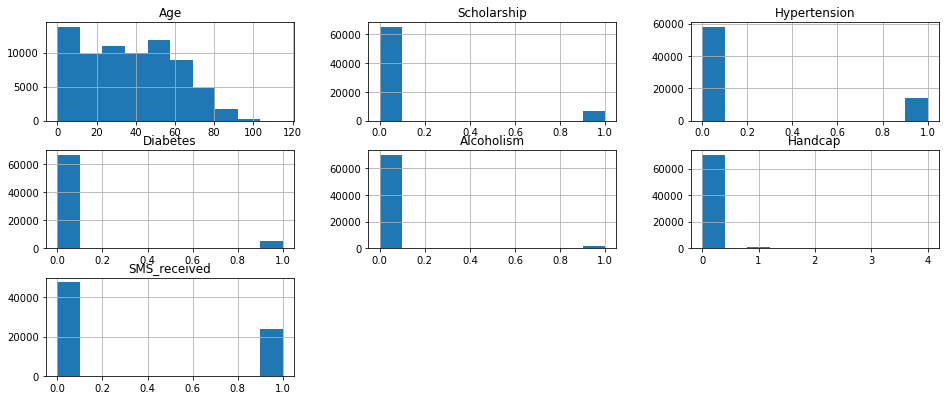

In [18]:
#to see the exploration  there in the data
df.hist(figsize=[16,6.5]);

In [19]:
#To explore and devide the patient who show and not show
show=df.No_show =='No'
notshow=df.No_show =='Yes'
df[show].count(),df[notshow].count()

(Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 Hypertension     54153
 Diabetes         54153
 Alcoholism       54153
 Handcap          54153
 SMS_received     54153
 No_show          54153
 dtype: int64,
 Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hypertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No_show          17663
 dtype: int64)

So the patients who had shown are 54153, who didn't show are 17663

The mean age for people who showd 37, and who no show  34, but we have here a critical question who the mean number of the showed patitents who recieved an SMS message is less than who no show 0.3<0.5 ,
we must recheck our SMS campaign

## investigation for the effective factors affect the attendance

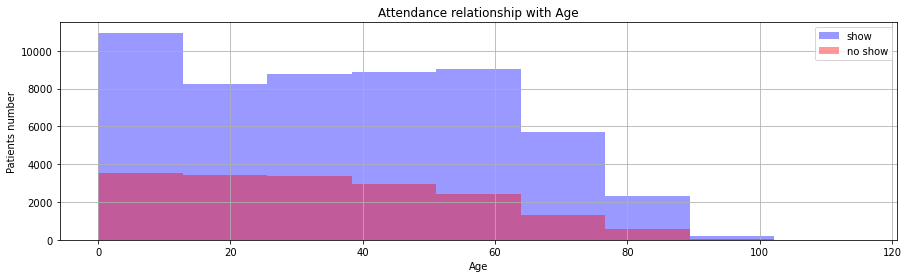

In [20]:
#We will see if the age can affect the attendance rate
def rate(df,colname,attended,absent):
    plt.figure(figsize=[15,4])
    df[colname][show].hist(alpha=0.4,bins=9,color='blue',label='show')
    df[colname][notshow].hist(alpha=0.4,bins=9,color='red',label='no show')
    plt.legend();
rate(df,'Age',show,notshow)
plt.title('Attendance relationship with Age')
plt.xlabel('Age')
plt.ylabel('Patients number');

    
    

It's clear tha the most showing patients are from ages 0:10 , so moms take care of their children, then from age 45:62, the least attendance are after 84

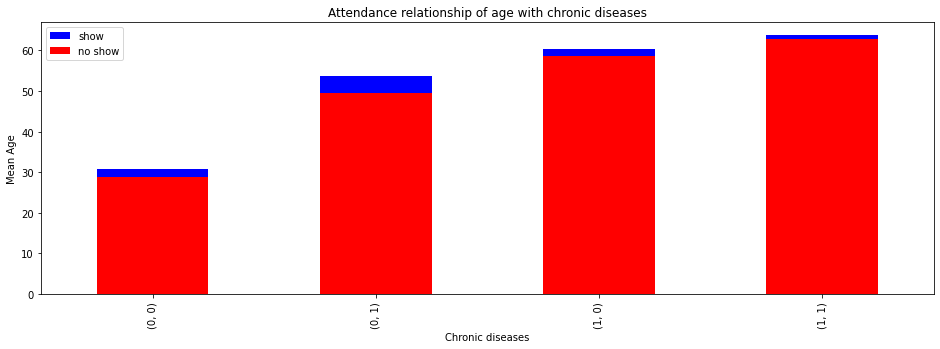

In [21]:
#Does age and chronic diseases affect the attendance rate ?
plt.figure(figsize=[16,5])
df[show].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color='blue',label='show')
df[notshow].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color='red',label='no show')
plt.legend();
plt.title('Attendance relationship of age with chronic diseases')
plt.xlabel('Chronic diseases')
plt.ylabel('Mean Age');


In [22]:
df[show].groupby(['Hypertension','Diabetes']).mean()['Age'],df[notshow].groupby(['Hypertension','Diabetes']).mean()['Age']

(Hypertension  Diabetes
 0             0           30.713360
               1           53.701370
 1             0           60.270517
               1           63.764303
 Name: Age, dtype: float64,
 Hypertension  Diabetes
 0             0           28.768691
               1           49.481172
 1             0           58.650380
               1           62.913282
 Name: Age, dtype: float64)

In the first bar we can see that the mean age of people who didn't suffer from chronic diseases is around 31, and small percentage of them who attend, and in the next bar shows patients who suffer from diabetes and it shows that the the mean number of patients who show is around 54, and who not show 49, it has a little bigger shown number, but the next bars three and four shows that the shown number of patients does not depend on if they have chronic diseases or not

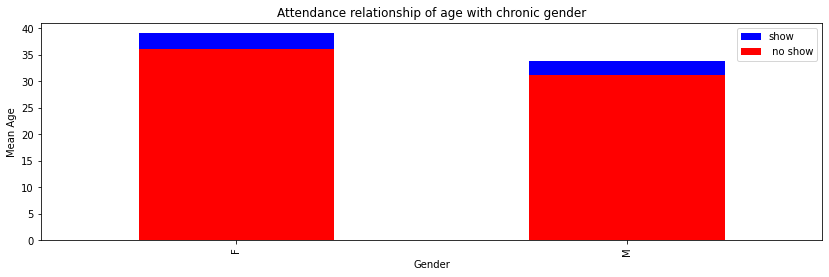

In [23]:
#To see if the gender with age has an effect on the attendance 
plt.figure(figsize=[14,4])
df[show].groupby(['Gender']).mean()['Age'].plot(kind='bar',color='blue',label='show')
df[notshow].groupby(['Gender']).mean()['Age'].plot(kind='bar',color='red',label=' no show')
plt.legend();
plt.title('Attendance relationship of age with chronic gender')
plt.xlabel('Gender')
plt.ylabel('Mean Age');


In [24]:
df[show].groupby(['Gender']).mean()['Age'],df[notshow].groupby(['Gender']).mean()['Age']

(Gender
 F    39.130292
 M    33.766269
 Name: Age, dtype: float64,
 Gender
 F    36.06501
 M    31.22040
 Name: Age, dtype: float64)

It's shown here that the number of shown female patients is a little bigger than of males, but it's clear that it doesn't affect the attendance

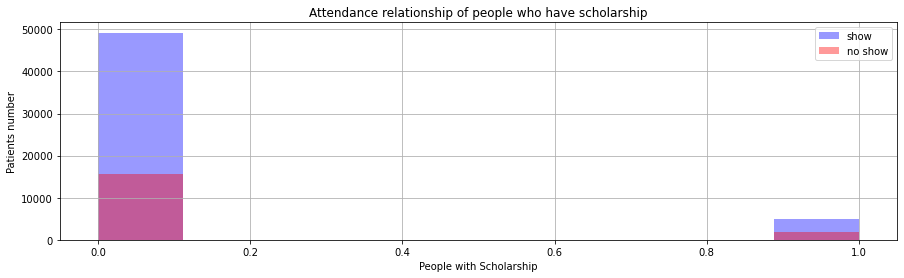

In [25]:
#The relationship of who have a scholarship with shown patients    
rate(df,'Scholarship',show,notshow)
plt.title('Attendance relationship of people who have scholarship')
plt.xlabel('People with Scholarship')
plt.ylabel('Patients number');





It's shown here that the attendance of patients who have a scholarship is larger than who don't have
so the scholarship may be on of the factors that affect the attendance 

The median number of people who have a scholarship and shown is 38, and who don't show is 33

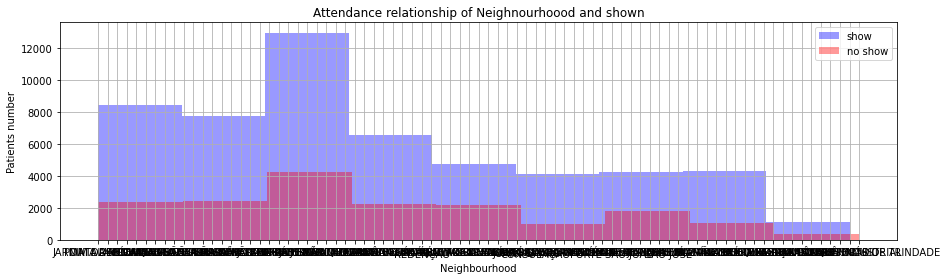

In [26]:
#Does neighbourhood affects the attendance ?    
rate(df,'Neighbourhood',show,notshow)
plt.title('Attendance relationship of Neighnourhoood and shown')
plt.xlabel('Neighbourhood')
plt.ylabel('Patients number');

It's clear that the neighbourhood has a great effect on the attendance

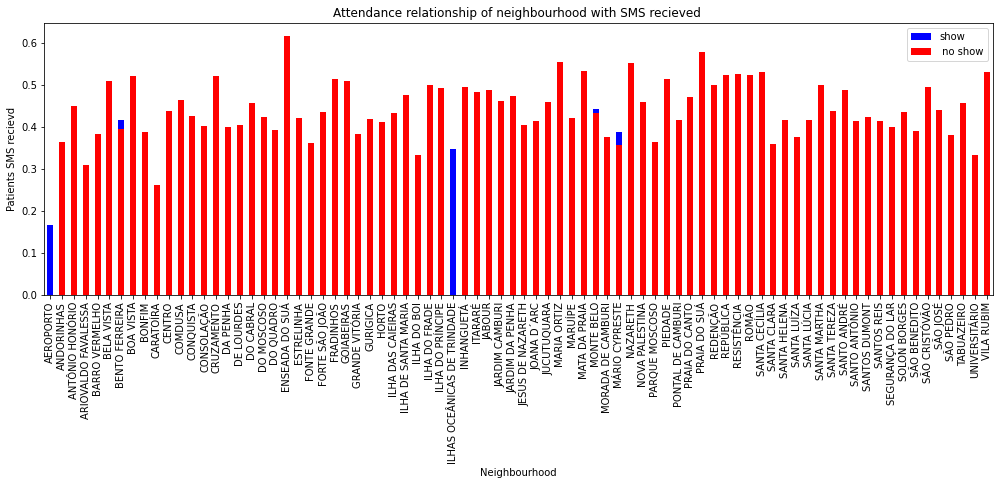

In [27]:
#TO see if the attendance can be affected by the neighboourhood with SMS recieved or not
plt.figure(figsize=[17,5])
df[show].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar',color='blue',label='show')
df[notshow].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar',color='red',label=' no show')
plt.legend();
plt.title('Attendance relationship of neighbourhood with SMS recieved ')
plt.xlabel('Neighbourhood')
plt.ylabel('Patients SMS recievd');

It's shown that only 5 regions that have recieved SMS messages, and we can see that 'ILHAS OCEANICAS DE TRINDADE' is the most affected region with SMS messages

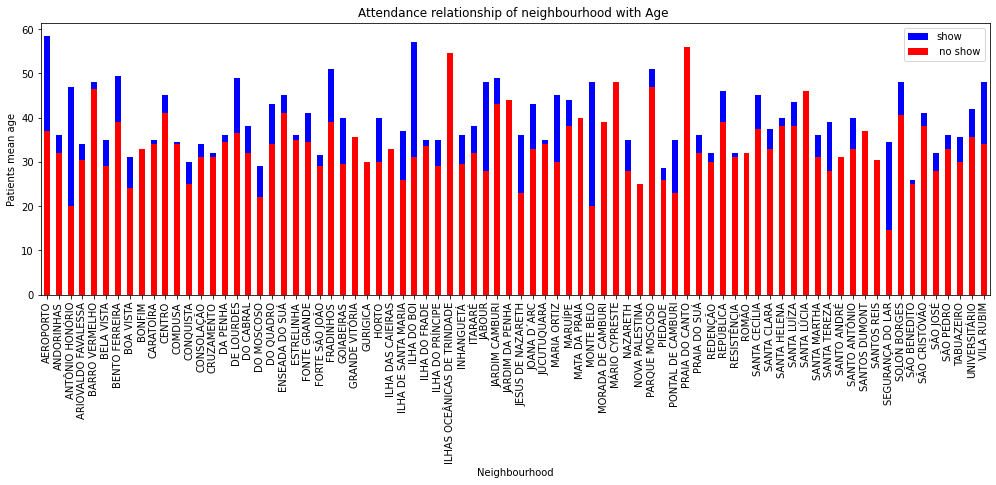

In [28]:
#TO see if the attendance can be affected by the neighboourhood with Age or not
plt.figure(figsize=[17,5])
df[show].groupby('Neighbourhood').Age.median().plot(kind='bar',color='blue',label='show')
df[notshow].groupby('Neighbourhood').Age.median().plot(kind='bar',color='red',label=' no show')
plt.legend();
plt.title('Attendance relationship of neighbourhood with Age ')
plt.xlabel('Neighbourhood')
plt.ylabel('Patients mean age');

Number of showing patients from specific neighbourhood affected by recieving SMS  

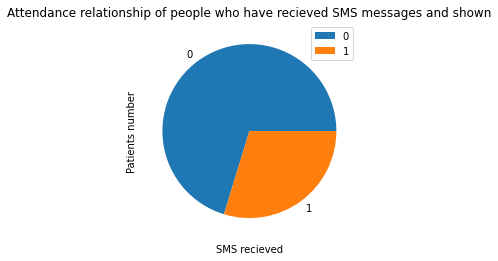

In [29]:
#The relationship of patients who recieved SMS messages and shown
def sms(df,colname,attended,absent):
    plt.figure(figsize=[15,4])
    df[colname][show].value_counts(normalize=True).plot(kind='pie',label='show')
    plt.legend();
sms(df,'SMS_received',show,notshow)
plt.title('Attendance relationship of people who have recieved SMS messages and shown')
plt.xlabel('SMS recieved')
plt.ylabel('Patients number');

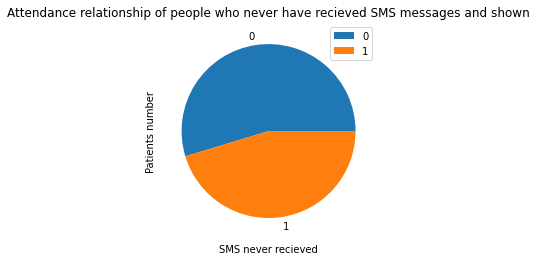

In [30]:
#The relationship of patients who don't recieve SMS messages and shown
def nsms(df,colname,attended,absent):
    plt.figure(figsize=[15,4])
    df[colname][notshow].value_counts(normalize=True).plot(kind='pie',label='show')
    plt.legend();
    plt.title('Attendance relationship of people who never have recieved SMS messages and shown')
    plt.xlabel('SMS never recieved')
    plt.ylabel('Patients number');
nsms(df,'SMS_received',show,notshow)

It's shown that the number of patients who show and didn't recieve SMS messages is bigger than who recieve,
so it's a must top recheck our SMS campaign

<a id='conclusions'></a>
## Conclusions

> Number of showing patients from specific neighbourhood affected by recieved SMS
>> Age has a clear effect on showing rate as It's clear tha the most showing patients are from ages 0:10 , so moms take care of their children, then from age 45:62, the least attendance are after 84
>>> the number of patients who show and didn't recieve SMS messages is bigger than who recieve,
so it's a must top recheck our SMS campaign



## Limitations

There is no clear relationship between showing with, age, chronic diseases, and gender